In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

#the following codes are copy pasted from the Andrew Ng CNN Model step by step program
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
"""
padding
1. For Making the output size not shrink, so the result may still be in the same shape. Useful if we implement deep layers
2. Keeps the information at the border of the image, since they are still evaluated

For padding, we can use np.pad(a, (pad shape for every layer), mode = "constant", constant = (0,0))
what this means is we pad the numpy array a with a decided pad shape for every layer, include every layer with
a tuple, and inside the tuple insert two number, which indicate the before n and after n. If we set the mode to constant,
we set the value of the pad as constant, we can modify the value inside constant_values=. Personally, we can modify our own
constant_valuees in each layer, but if we set it only 1 tuple, this standard will follow the rest. The first number is for the before n
value, the second one is for the after n value. By default, mode is set to constant and constant_values = 0.
"""

def zeroPad(x, nPad):
    """Pad numpy array x with 0 in before and beginning based on the nPad number. For now, we want the horizontal and vertical
    pad to be the same number
    
    input:
    x = np.array in the shape of [m, nh, nw, nc]
    nPad = integer that symbolizes the number of pad for the layer  nh and nw, should be bigger than 0
    
    return:
    paddedX = np.array in the shape of [m, nh + 2*nPad, nw + 2*nPad, nc]. All padded by zero"""
    
    paddedX = np.pad(x, ((0,0), (nPad,nPad), (nPad,nPad), (0,0)), mode = "constant", constant_values = (0,0))
    return paddedX

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


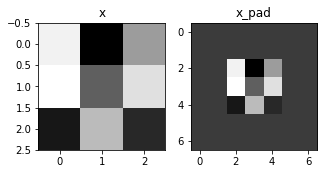

In [3]:
#this test is copied from Andrew Ng test code
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zeroPad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

#subplots is used to make a 'drawing board' for displaying the picture
fig, axarr = plt.subplots(1, 2) #the figure has 1 row and 2 column (hence 2 picture)
#fig is a class inside matplotlib, while axarr is the array of axis to plot
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [4]:
"""Implement the calculation of sliced a with the convolution filter and bias by:
1. Element wise multiplication of sliced a with the convolution filter (np.multiply)
2. sum the result numpy array (np.sum)
3. add the bias"""

def singleStepConvolution(aSlice, w, b):
    """element multiplication for aSlice with filtArray, sum the result of the multiplication, and add the bias
    just as in 1 step of convolution
    
    Parameters:
    - aSlice = aLayer that has been crop so that it has the same shape with w, shape = [f, f, nc]
    - w = np.array for the filter [f, f, nc]
    - b = np.array of bias that wants to be added after the sum, shape = (1,1)
    
    Return:
    - res = ffloat of the convolution result of the previous part"""
    
    elementMultiplied = np.multiply(aSlice, w)
    summedElement = np.sum(elementMultiplied)
    summedElement+=float(b)
    return summedElement

In [5]:
#this test case is copy pasted from the Andrew Ng
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = singleStepConvolution(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


In [6]:
def convForward(A_prev, w, b, hparameters):
    """This function is used to implement one layer of convolution process
    parameters:
    A_prev = a numpy array in a shape of (m, nH_prev, nW_prev, nC_prev)
    w = the filter for the convolution, in a shape of (f, f, nC_prev, nC)
    b = the bias for each convolution process, in a shape of (1,1,1,nC)
    hparameters = the dictionary containing 'stride' and 'pad'
    
    return value:
    Z = result of the convolution in shape of (m, nH, nW, nC)
    cache = value needed for backward prop of convolution, which is the A_prev, w, b, hparameters"""
    
    m, nH_prev, nW_prev, nC_prev = A_prev.shape[0], A_prev.shape[1], A_prev.shape[2], A_prev.shape[3]
    
    f, nC = w.shape[0], w.shape[3]
    
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    paddedA_prev = zeroPad(A_prev, pad)
    
    #start doing the convolution using for
    nH = int((nH_prev + 2*pad - f)/stride) + 1
    nW = int((nW_prev + 2*pad - f)/stride) + 1
    
    #initialize the output
    z = np.zeros((m, nH, nW, nC))
    
    #starting the for
    for datapoint in range(m):
        for vertical in range(nH):
            verticalStart = vertical * stride
            verticalEnd = verticalStart + f #the end index will not join
            for horizontal in range(nW):
                horizontalStart = horizontal * stride
                horizontalEnd = horizontalStart + f #the end index will not join
                for curChannel in range(nC):
                    slicedA_prev = paddedA_prev[datapoint, verticalStart:verticalEnd, horizontalStart:horizontalEnd, :]
                    currentFilter = w[:,:,:,curChannel]
                    currentBias = b[:,:,:,curChannel]
                    convResult = singleStepConvolution(slicedA_prev, currentFilter, currentBias)
                    z[datapoint, vertical, horizontal, curChannel] = convResult
    # Making sure your output shape is correct
    assert(z.shape == (m, nH, nW, nC))
    #everything has been set, starting making the cache and returning the z, cache
    cache = A_prev, w, b, hparameters
    return z, cache

In [7]:
#This test case is from the Andrew Ng Exercise
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = convForward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


In [8]:
def poolForward(A_prev, hparameters, mode = "max"):
    """This function is used as a pooling, where it works like convolution but no parameters
    needed because we can directly count the average or the max value of the sliced ones
    
    Parameters:
    A_prev: numpy array in the shape of (m, nHPrev, nWPrev, nC)
    hparameters: a dictionary containing 'f' (filter size) and 'stride', no pad
    mode  : choose between 'average' or 'max'
    
    return:
    A : numpy array output of thee pooling, in shape of (m, nH, nW, nC)
    cache: tuple containing input, containing A_prev and hparameters"""
    
    #retrieve the m, nHPrev, nWPrev, nC
    m, nHPrev, nWPrev, nC = A_prev.shape[0], A_prev.shape[1], A_prev.shape[2], A_prev.shape[3]
    f, stride = hparameters["f"], hparameters["stride"]
    
    #using the int to floor the result
    nH = int((nHPrev - f)/stride) + 1
    nW = int((nWPrev - f)/stride) + 1
    
    #make an empty Z
    A = np.zeros((m, nH, nW, nC))
    for datapoint in range(m):
        for vertical in range(nH):
            verticalStart = vertical*stride
            verticalEnd = verticalStart + f
            for horizontal in range(nW):
                horizontalStart = horizontal*stride
                horizontalEnd = horizontalStart + f
                for currentChannel in range(nC):
                    ASliced = A_prev[datapoint, verticalStart:verticalEnd, horizontalStart:horizontalEnd, currentChannel]
                    if(mode == "max"):
                        A[datapoint, vertical, horizontal, currentChannel] = np.max(ASliced)
                    elif(mode == "average"):
                        A[datapoint, vertical, horizontal, currentChannel] = np.mean(ASliced)
                    else:
                        raise ValueError
    # Making sure your output shape is correct
    assert(A.shape == (m, nH, nW, nC))
    cache = (A_prev, hparameters)
    return A, cache

In [9]:
#test case from Andrew Ng Course
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = poolForward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = poolForward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

In [10]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = poolForward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()

A, cache = poolForward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 2, 2, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 2, 2, 3)
A =
 [[[[-0.03010467 -0.00324021 -0.33629886]
   [ 0.12893444  0.22242847  0.1250676 ]]

  [[-0.38268052  0.23257995  0.6259979 ]
   [-0.09525515  0.268511    0.46605637]]]


 [[[-0.17313416  0.32377198 -0.34317572]
   [ 0.02030094  0.14141479 -0.01231585]]

  [[ 0.42944926  0.08446996 -0.27290905]
   [ 0.15077452  0.28911175  0.00123239]]]]


## FROM ANDREW NG COURSE
## 5 - Backpropagation in convolutional neural networks 
### 5.1 - Convolutional layer backward pass 

Let's start by implementing the backward pass for a CONV layer. 

#### 5.1.1 - Computing dA:
This is the formula for computing $dA$ with respect to the cost for a certain filter $W_c$ and a given training example:

$$ dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}$$

Where $W_c$ is a filter and $dZ_{hw}$ is a scalar corresponding to the gradient of the cost with respect to the output of the conv layer Z at the hth row and wth column (corresponding to the dot product taken at the ith stride left and jth stride down). Note that at each time, we multiply the the same filter $W_c$ by a different dZ when updating dA. We do so mainly because when computing the forward propagation, each filter is dotted and summed by a different a_slice. Therefore when computing the backprop for dA, we are just adding the gradients of all the a_slices. 

In code, inside the appropriate for-loops, this formula translates into:
```python
da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
```

#### 5.1.2 - Computing dW:
This is the formula for computing $dW_c$ ($dW_c$ is the derivative of one filter) with respect to the loss:

$$ dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$$

Where $a_{slice}$ corresponds to the slice which was used to generate the activation $Z_{ij}$. Hence, this ends up giving us the gradient for $W$ with respect to that slice. Since it is the same $W$, we will just add up all such gradients to get $dW$. 

In code, inside the appropriate for-loops, this formula translates into:
```python
dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
```

#### 5.1.3 - Computing db:

This is the formula for computing $db$ with respect to the cost for a certain filter $W_c$:

$$ db = \sum_h \sum_w dZ_{hw} \tag{3}$$

As you have previously seen in basic neural networks, db is computed by summing $dZ$. In this case, you are just summing over all the gradients of the conv output (Z) with respect to the cost. 

In code, inside the appropriate for-loops, this formula translates into:
```python
db[:,:,:,c] += dZ[i, h, w, c]
```
 

In [11]:
def convBackward(dZ, cache):
    """This function is used as a function to find back propagation of Convolution layer,
    mathematical formula is pasted on the previous cell
    
    Input:
    dZ: partial derivative of loss of dZ(shape = m, nH, nW, nC) from next cell
    cache: convForward cache, containing APrev (shape = m, nHPrev, nWPrev, nCprev), 
    w (shape = f,f,nCPrev,nC), b (shape = 1x1x1xnC), hparameters(containing int stride and pad)
    
    
    Output:
    dAPrev = derivative of dL/dAPrev, with shape = APrev.shape
    dW = derivative of dL/dW, with shape = w.shape
    db = derivative of db/dw, with shape = b.shape"""
    
    
    #retrieve every important shape data
    m, nH, nW, nC = dZ.shape[0], dZ.shape[1], dZ.shape[2], dZ.shape[3]
    APrev, w, b, hparameters = cache[0], cache[1], cache[2], cache[3]
    nHPrev, nWPrev, nCPrev = APrev.shape[1], APrev.shape[2], APrev.shape[3]
    f = w.shape[0]
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    #initialize dAPrev, dw, db
    dAPrev = np.zeros((APrev.shape))
    dW = np.zeros((w.shape))
    db = np.zeros((b.shape))
    
    #pad the APrev, because it hasnt padded like the one inside the forward prop
    APrevPad = zeroPad(APrev, pad)
    dAPrevPad = zeroPad(dAPrev, pad)
    
    #iterate for datapoint
    for datapoint in range(m):
        aPrevPad = APrevPad[datapoint, :,:,:]
        daPrevPad = dAPrevPad[datapoint, :, :,:]
        #iterate for vertical (output based)
        for vertical in range(nH):
            #decide the start for the input
            vertStart = vertical*stride
            vertEnd = vertStart + f
            #iterate for horizontal (output based)
            for horizontal in range(nW):
                #decide the start for the input
                horiStart = horizontal * stride
                horiEnd = horiStart + f
                #iterate for output channel
                for channel in range(nC):
                    #cut aSlice based on the vertStart, vertEnd and horiStart, horiEnd of aPrevPad
                    aSlicedPad = aPrevPad[vertStart:vertEnd, horiStart:horiEnd, :]  #nCPrev use all because they all contribute to the layer
                    
                    #start counting
                    daPrevPad[vertStart:vertEnd, horiStart:horiEnd, :] += w[:,:,:,channel] * dZ[datapoint,vertical,horizontal,channel]
                    dW[:,:,:,channel] += dZ[datapoint,vertical,horizontal,channel] * aSlicedPad #it affects one whole layer because this filter is used for one output channel
                    db[:,:,:,channel] += dZ[datapoint,vertical,horizontal,channel]
        #set back each datapoint  to its respective dAPrev
        dAPrev[datapoint,:,:,:] = daPrevPad[pad:-pad,pad:-pad,:]
        
    # Making sure your output shape is correct
    assert(dAPrev.shape == (m, nHPrev, nWPrev, nCPrev))
    
    return dAPrev, dW, db

In [12]:
#this test case is from ANDREW NG
# We'll run conv_forward to initialize the 'Z' and 'cache_conv",
# which we'll use to test the conv_backward function
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = convForward(A_prev, W, b, hparameters)

# Test conv_backward
dA, dW, db = convBackward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = 1.4524377775388075
dW_mean = 1.7269914583139097
db_mean = 7.839232564616838


In [16]:
def createMaskFromWindow(x):
    """Make a numpy array mask to identify where the max value of X
    
    Input:
    x = np.array of shape(f,f)
    
    Output:
    mask = array the same shape as x, containing True if the at the position where max is"""
    
    #true if x is max, false if x is not
    mask = (x == np.max(x))
    
    return mask

In [17]:
#This test case is from Andrew Ng
np.random.seed(1)
x = np.random.randn(2,3)
mask = createMaskFromWindow(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


In [18]:
def distributeValue(dZ, shape):
    """This function is used if we want to equally distribute the value of dZ to each array
    element in an array shape. 
    
    Input:
    dZ = scalar for dZ value
    shape = (nH, nW) for the desired shape
    
    Output:
    A = array of shape(nH, nW) after value of dZ is distributed"""
    
    A = np.ones(shape)
    A *= (dZ / (shape[0] * shape[1]))
    return A
    
    

In [19]:
#This test case is from the Andrew Ng exercise
a = distributeValue(2, (2,2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


In [45]:
#Putting everything together for pool backward
def poolBackward(dA, cache, mode = "max"):
    """This function will be used to count the backward pass of the pooling layer
    
    Input:
    dA = dL/dA until layer A (next layer after the pool)
    cache = cache during the poolForward, containing APrev and hparameters 
    mode = the same mode used in poolForward, it can be max or average
    
    Output: 
    dAPrev: the dL/dAPrev of the previous input, same shape with APrev"""
    
    m, nH, nW, nC = dA.shape[0], dA.shape[1], dA.shape[2], dA.shape[3]
    APrev, hparameters = cache
    stride = hparameters["stride"]
    f = hparameters["f"]
    nWPrev, nBPrev = APrev.shape[1], APrev.shape[2] #no need to count nCPrev anymore since they are the same
    
    #intialize dAPrev
    dAPrev = np.zeros(APrev.shape)
    
    for datapoint in range(m):
        #evaluate based on output layer
        for vertical in range(nH): 
            vertStart = vertical*stride
            vertEnd = vertStart + f
            for horizontal in range(nW):
                horiStart = horizontal * stride
                horiEnd = horiStart + f
                for channel in range(nC):
                    if mode == "max":
                        aSlice = APrev[datapoint, vertStart:vertEnd, horiStart:horiEnd, channel] #retrieve the sliced A to check for max
                    
                        #check for max and create mask to multiply it
                        mask = createMaskFromWindow(aSlice)
                        
                        #edit only the dAPrev with the max, by using += with (mask * dZ, so that only the one with true will be editted)
                        dAPrev[datapoint, vertStart:vertEnd, horiStart:horiEnd, channel] += (mask * dA[datapoint, vertical, horizontal, channel])
                    elif mode == "average":
                        aSlice = APrev[datapoint, vertStart:vertEnd, horiStart:horiEnd, channel]
                        
                        #add the desired dAPrev with the distributeValue
                        dAPrev[datapoint, vertStart:vertEnd, horiStart:horiEnd, channel] += distributeValue(dA[datapoint, vertical, horizontal, channel], [f,f])
                    else:
                        print("Undefined mode!")
                        raise ValueError
                        
    return dAPrev

In [46]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = poolForward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = poolBackward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = poolBackward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 

mode = max
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]


In [32]:
a = np.zeros((3,3))
b = np.ones((2,2))
a[1:3, 1:3] = b
print(a)

[[0. 0. 0.]
 [0. 1. 1.]
 [0. 1. 1.]]
